# Il dataset

Le features sono calcolate da immagini digitalizzate di un agospirato di una massa tumorale (una delle più comuni tecniche di diagnosi). Descrivono le caratteristiche dei nuclei delle cellule presenti nelle immagini raccolte dal Gennaio 1989 a Novembre 1991

Il dataset appartiene all'University of Wisconsin Hospitals Madisone contiene 569 istanze (357 benigne e 212 maligne).

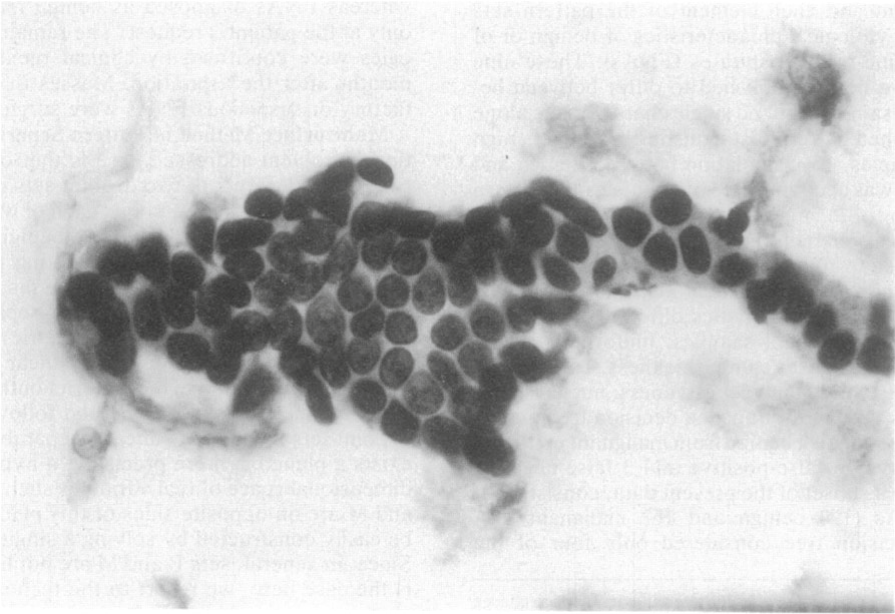

## Dieci valori calcolati rispetto al nucleo cellulare
- raggio (media delle distanze dal centro ai punti sul perimetro)
- texture (deviazione standard dei valori sulla scala di grigi)
- perimetro
- area
- regolarità della superficie (variazioni locali della lunghezza del raggio)
- grado di compattezza (perimetro^2 / area - 1.0)
- concavità (gravità delle porzioni concave del contorno)
- numero di punti concavi (numero di punti concavi nel contorno)
- simmetria
- dimensione frattale ("approssimazione della linea costiera" - 1)

Siccome le immagini rappresentano un insieme di cellule, per ogni attributo sono riportati:
- **media**: la media della misura di tutte le cellule presenti nell'immagine
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

dove \( n \) è il numero di osservazioni e \( x_i \) sono i valori dei dati.
- **standar error**: l'errore standard calcolato come:
$$
SE = \frac{s}{\sqrt{n}}
$$

dove \( s \) è la deviazione standard del campione, e \( n \) è il numero di osservazioni.
- **best/worst**: indica, tra tutte le cellule quella con l'attributo migliore/peggiore

## Librerie

In [26]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Caricamento dati in Memoria e Visualizzazione

In [27]:
df = pd.read_csv('./data/Cancer.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Preprocessing del Dataset
Siccome gli attributi **id** e **Unnamed 32** non sono features utili ai nostri scopi le rimuoviamo dal dataset

In [28]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
## inplace=True indica che l'operazione è fatta 'inplace' ossia non viene generata una copia e il metodo ritorna None
df.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Separiamo il dataset in 3 diversi sottoinsiemi in base al significato delle features (media, errore standard e migliore/peggiore)

In [29]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [30]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

# Exploratory Data Analysis (EDA)
L’**Exploratory Data Analysis** (EDA) permette di esplorare i dati in modo approfondito per comprenderne le caratteristiche principali, identificare eventuali pattern, rilevare anomalie e verificare le ipotesi preliminari. La EDA aiuta a prendere decisioni informate su quali metodi di analisi e modelli applicare successivamente

## Comprensione del Dataset
Esaminiamo le variabili disponibili, il loro significato e il loro tipo (numerico, categorico, binario).

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Controlliamo la presenza di valori nulli

In [32]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Statistica Descrittiva
Calcoliamo statistiche per le variabili continue e valutiamo la distribuzione di ogni variabile per identificare eventuali asimmetrie o concentrazioni di dati

In [33]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

<Axes: xlabel='diagnosis', ylabel='count'>

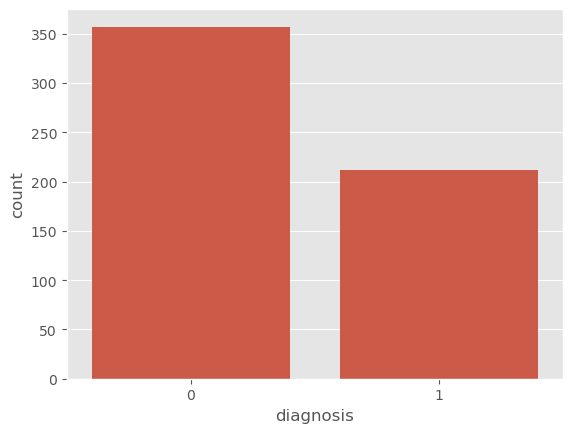

In [34]:
sns.countplot(df, x='diagnosis')

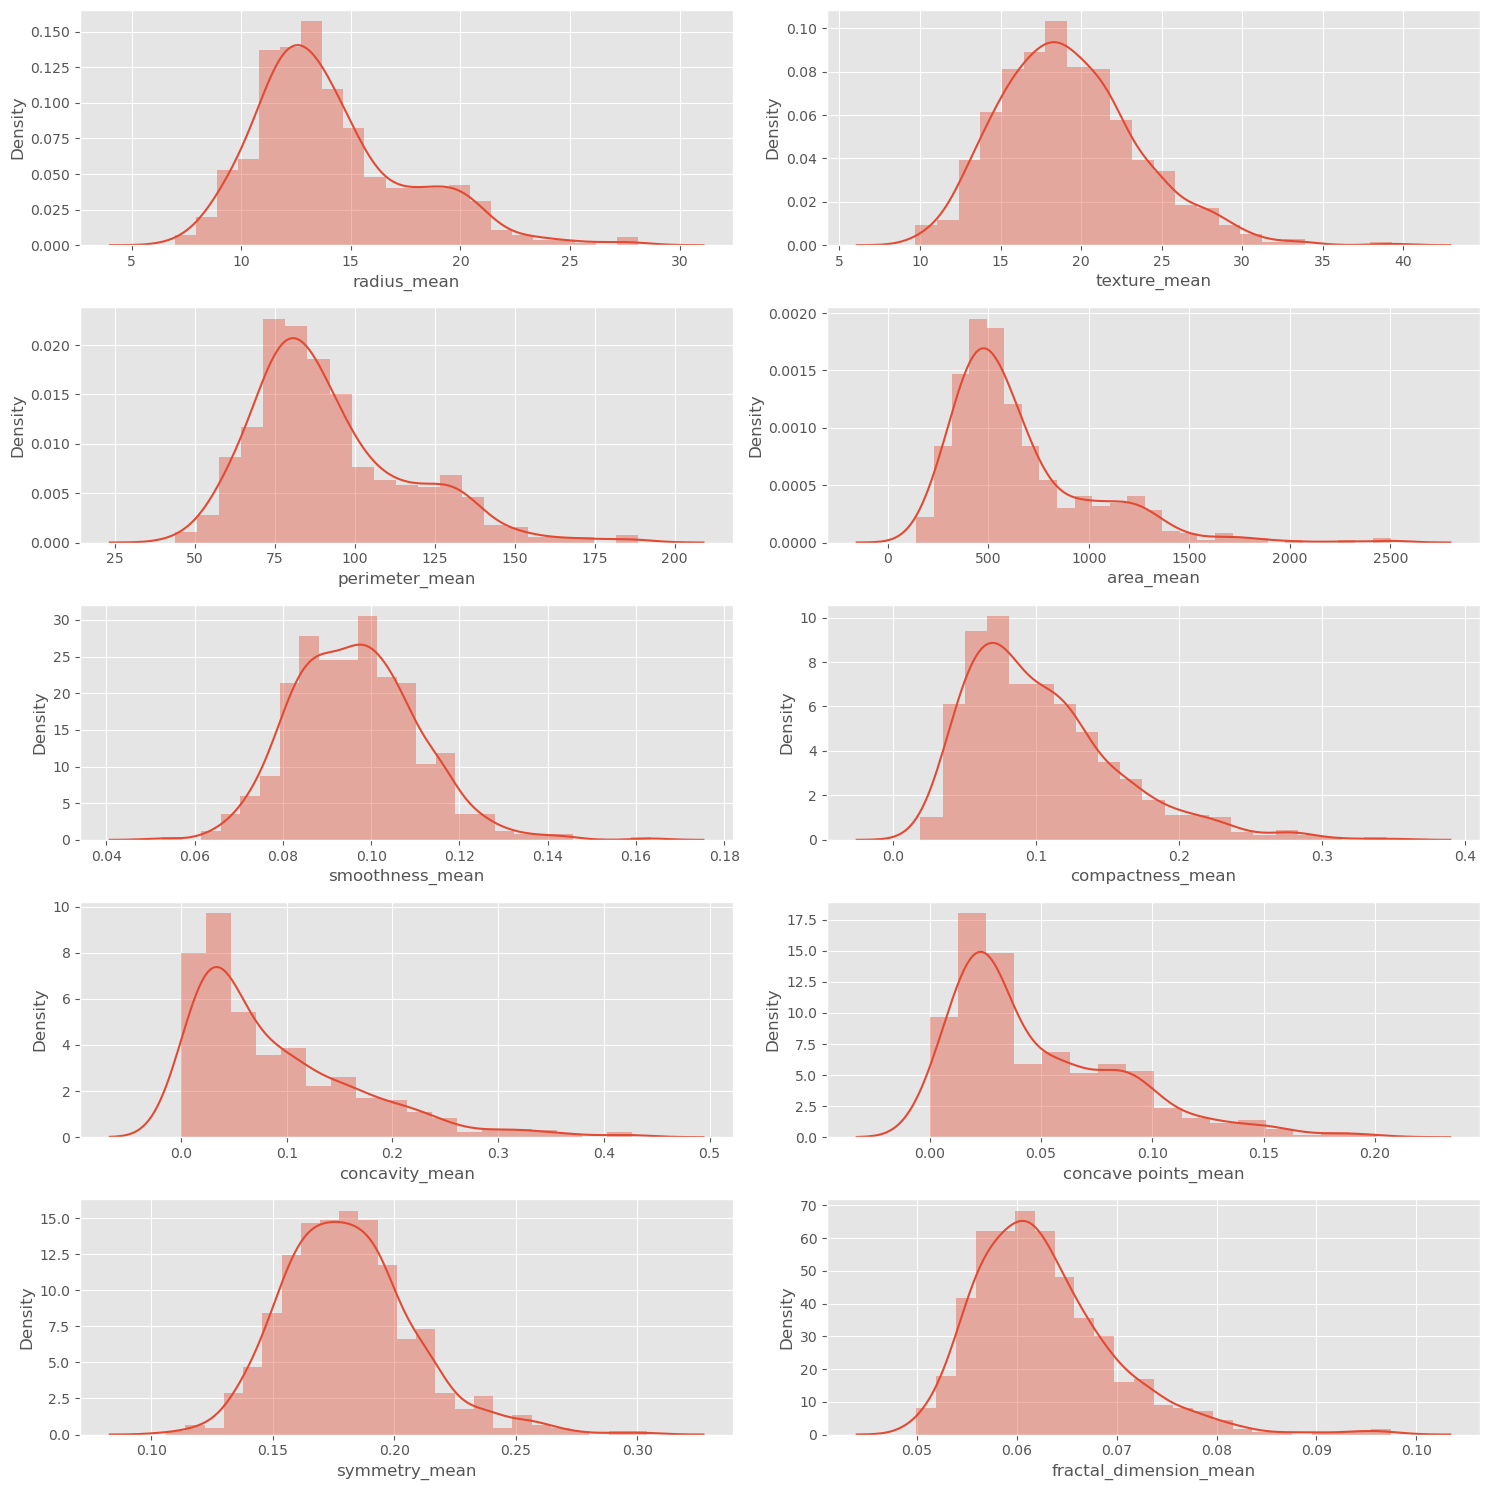

In [35]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for column in features_mean:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

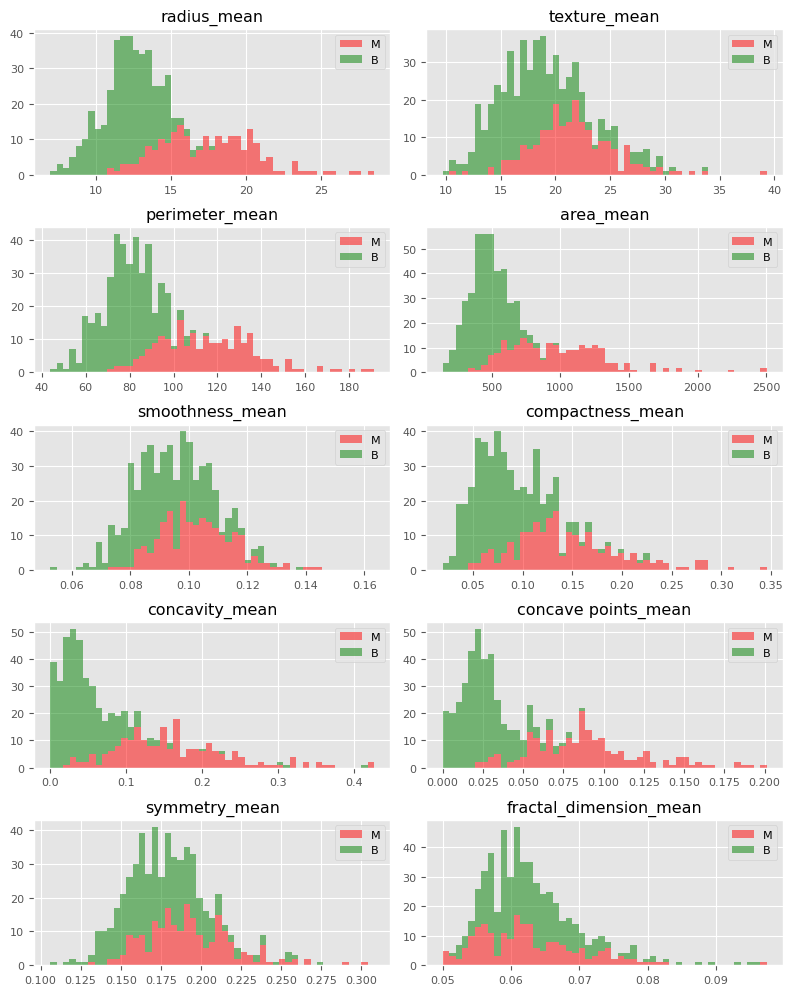

In [36]:
# con le classi
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

## Relazione tra le Features
In questa sezione cerchiamo eventuali relazioni tra le features, nello specifico creiamo la heatmap delle correlazioni  per verificare la presenza di correlazioni tra le variabili.

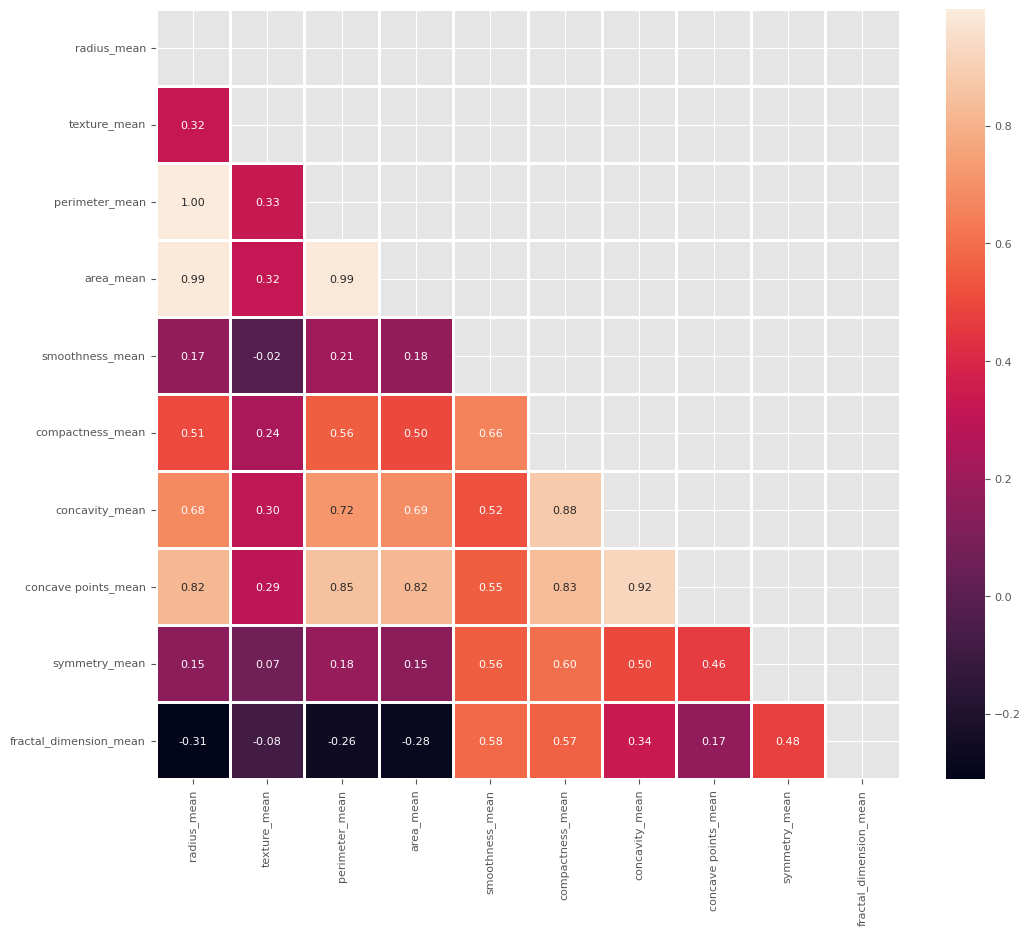

In [37]:
plt.figure(figsize = (12, 10))

corr = df[features_mean].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

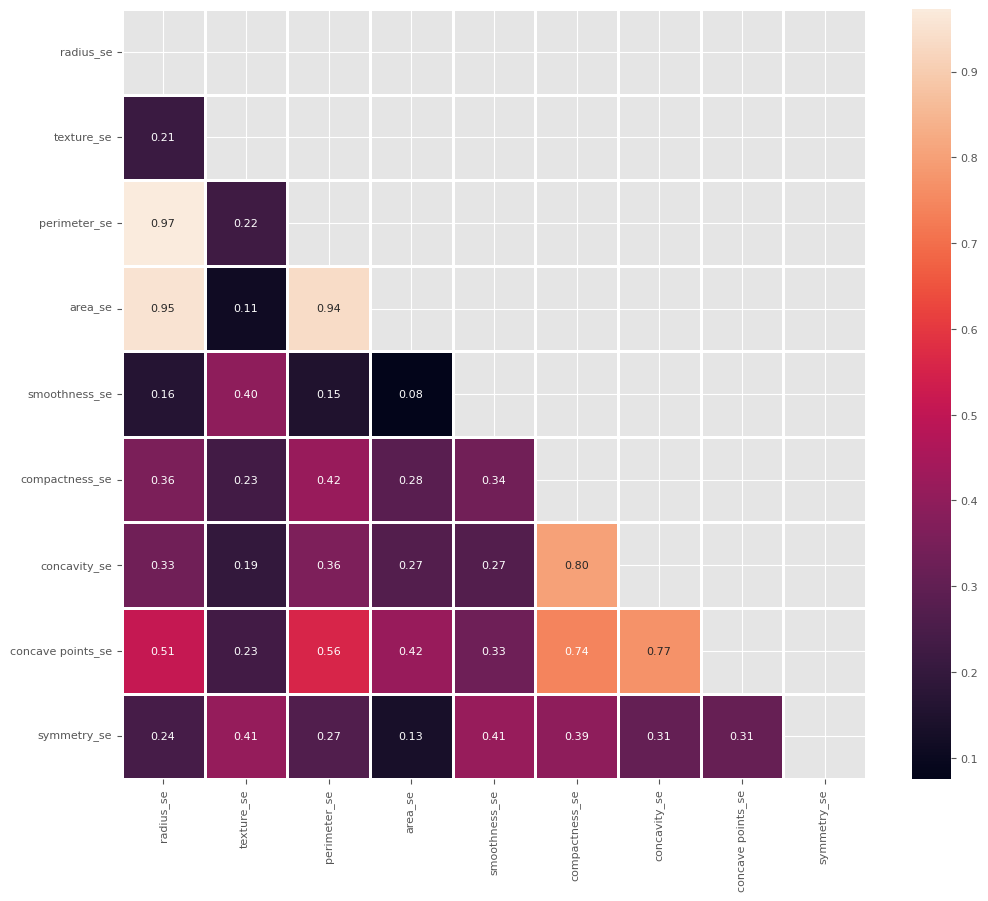

In [38]:
plt.figure(figsize = (12, 10))

corr = df[features_se].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

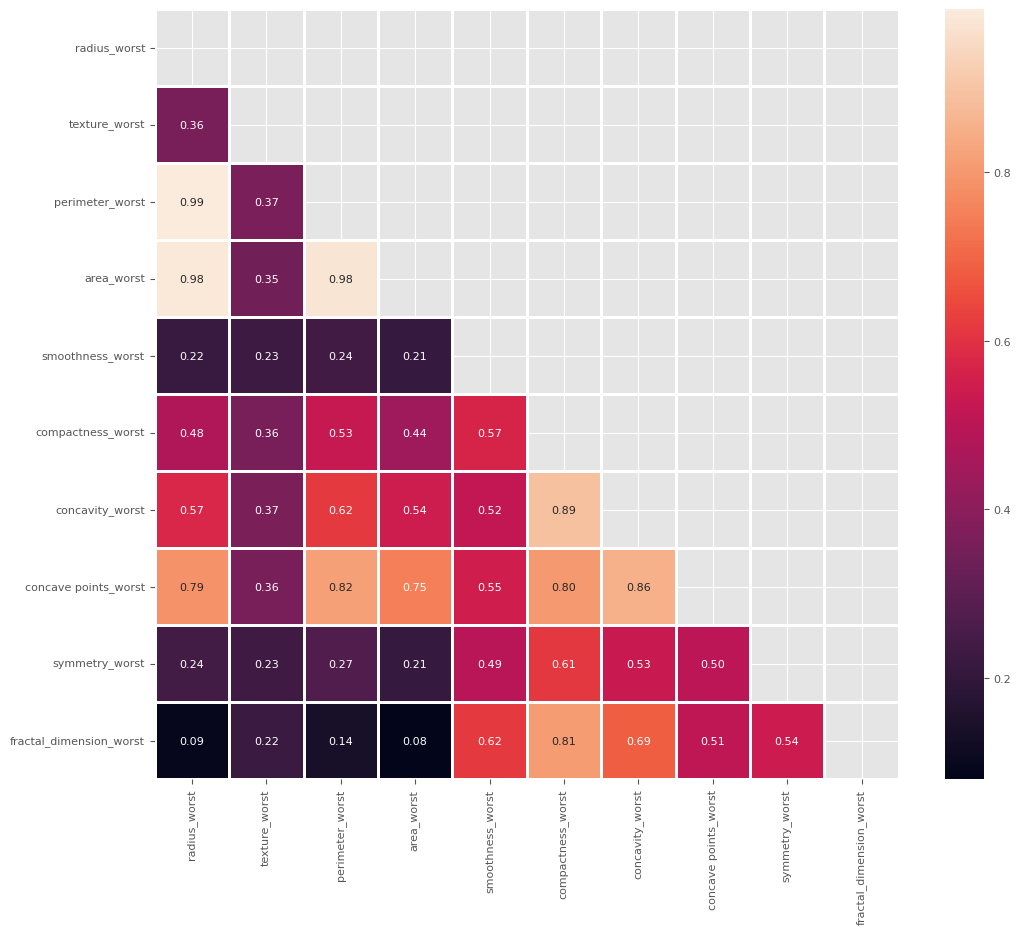

In [39]:
plt.figure(figsize = (12, 10))

corr = df[features_worst].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

## Outliers

In questa sezione, analizziamo la presenza di outlier nel dataset, ovvero dati anomali o estremi che si discostano in modo significativo dal comportamento generale delle altre osservazioni. Gli outlier possono fornire indicazioni utili su errori di misurazione, caratteristiche rare o casi eccezionali, ma potrebbero anche distorcere i risultati delle analisi statistiche e compromettere le prestazioni dei modelli predittivi.

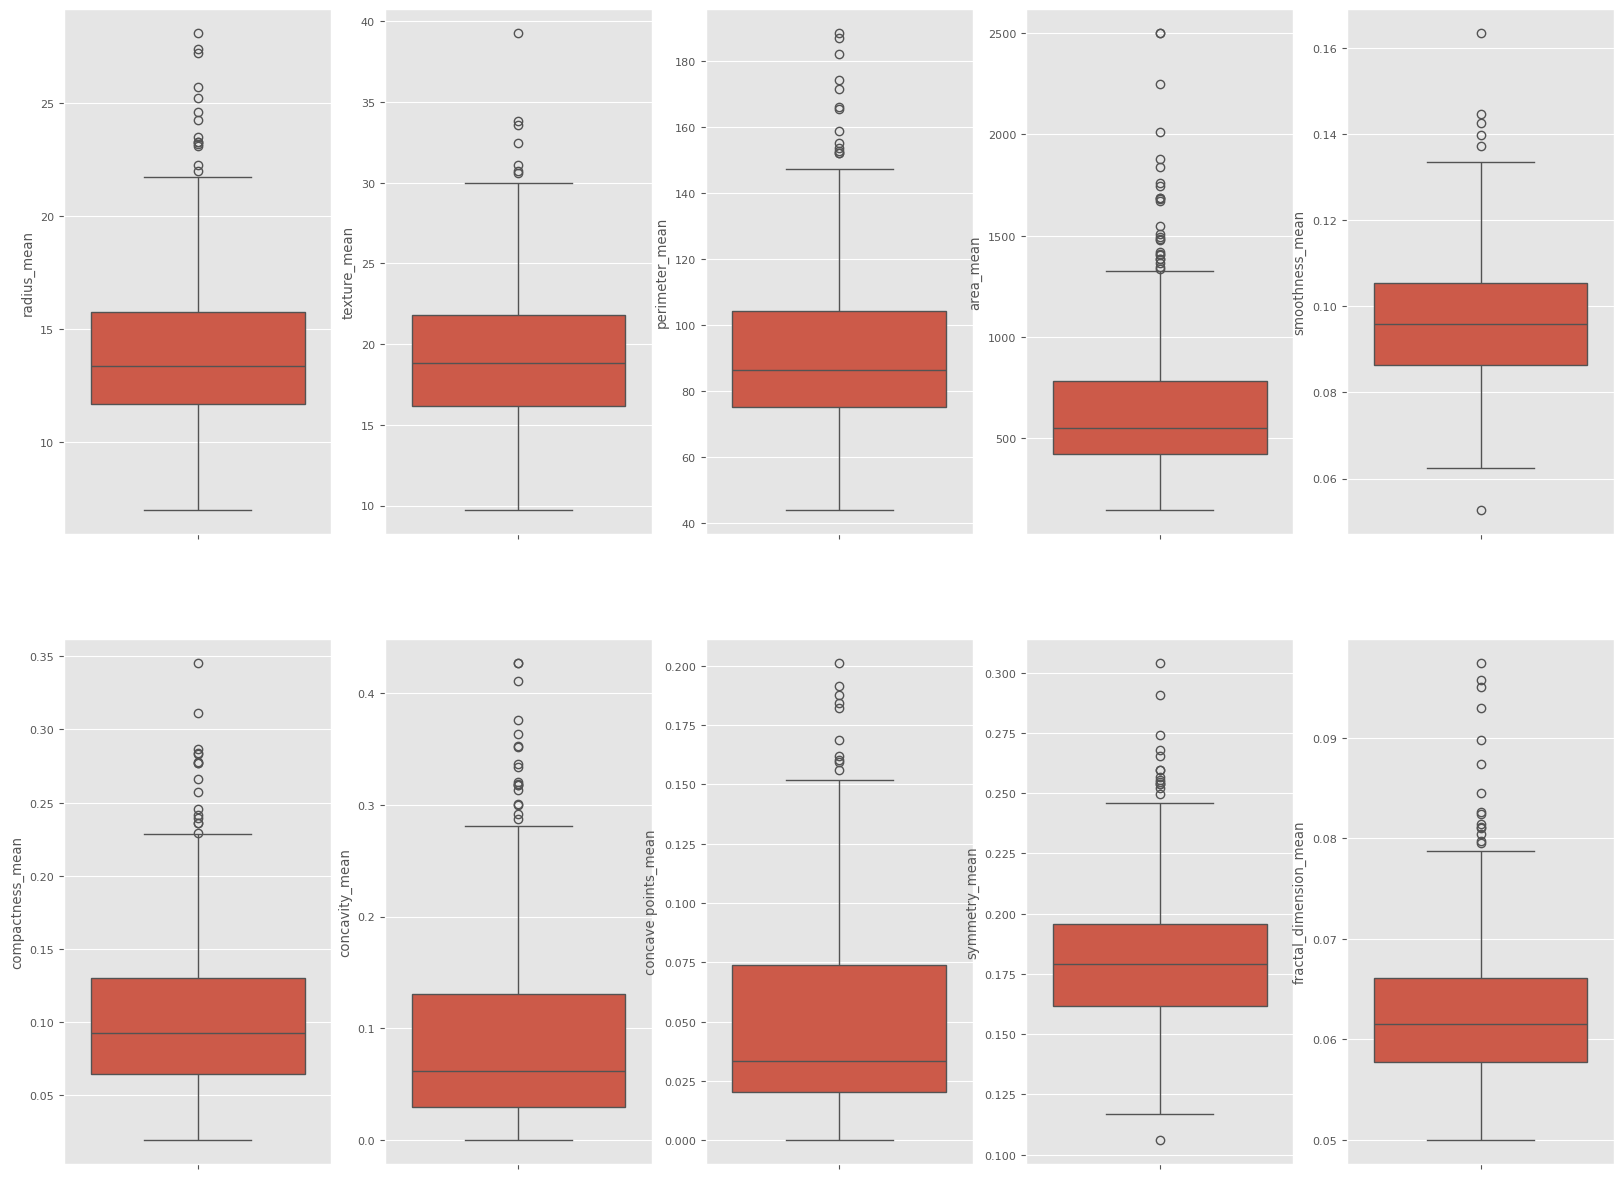

In [40]:
plt.figure(figsize=(20,15))
pos = 1
for i in df.columns[1:11]:
    plt.subplot(2, 5, pos)
    sns.boxplot(data=df[i])
    pos += 1

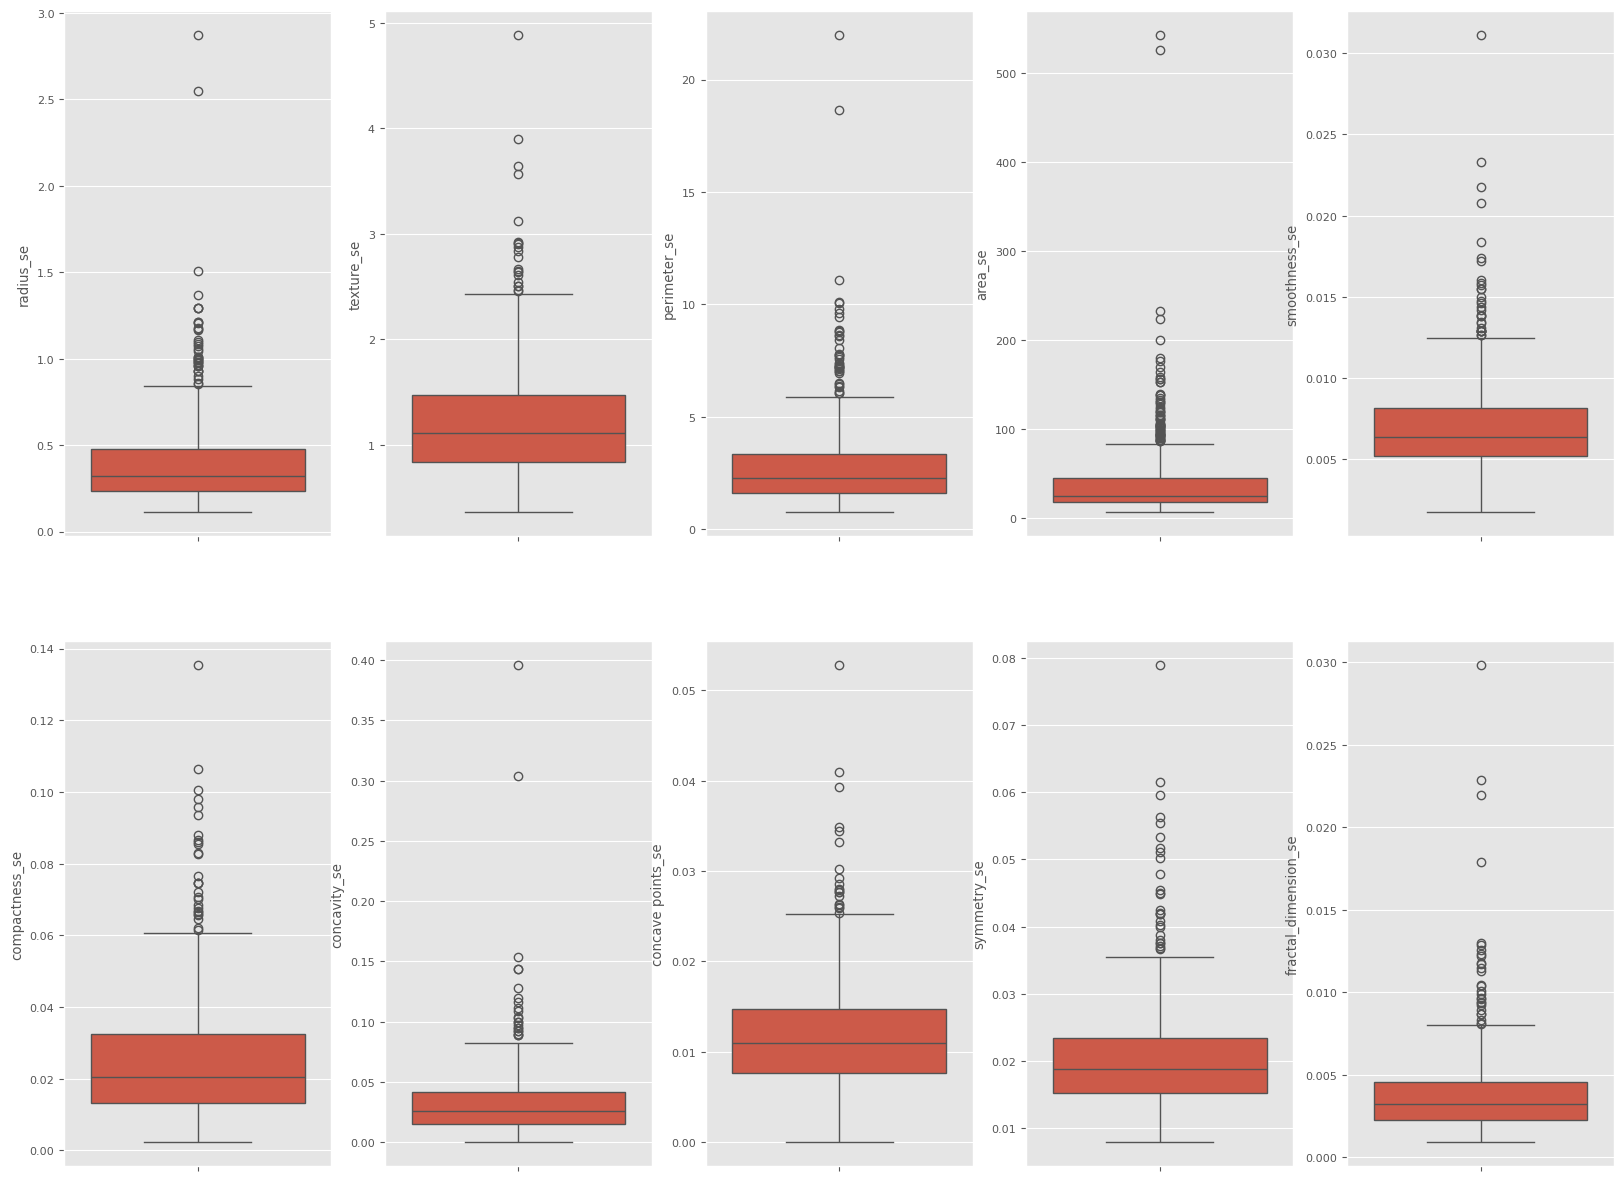

In [41]:
plt.figure(figsize=(20,15))
pos = 1
for i in df.columns[11:21]:
    plt.subplot(2, 5, pos)
    sns.boxplot(data=df[i])
    pos += 1

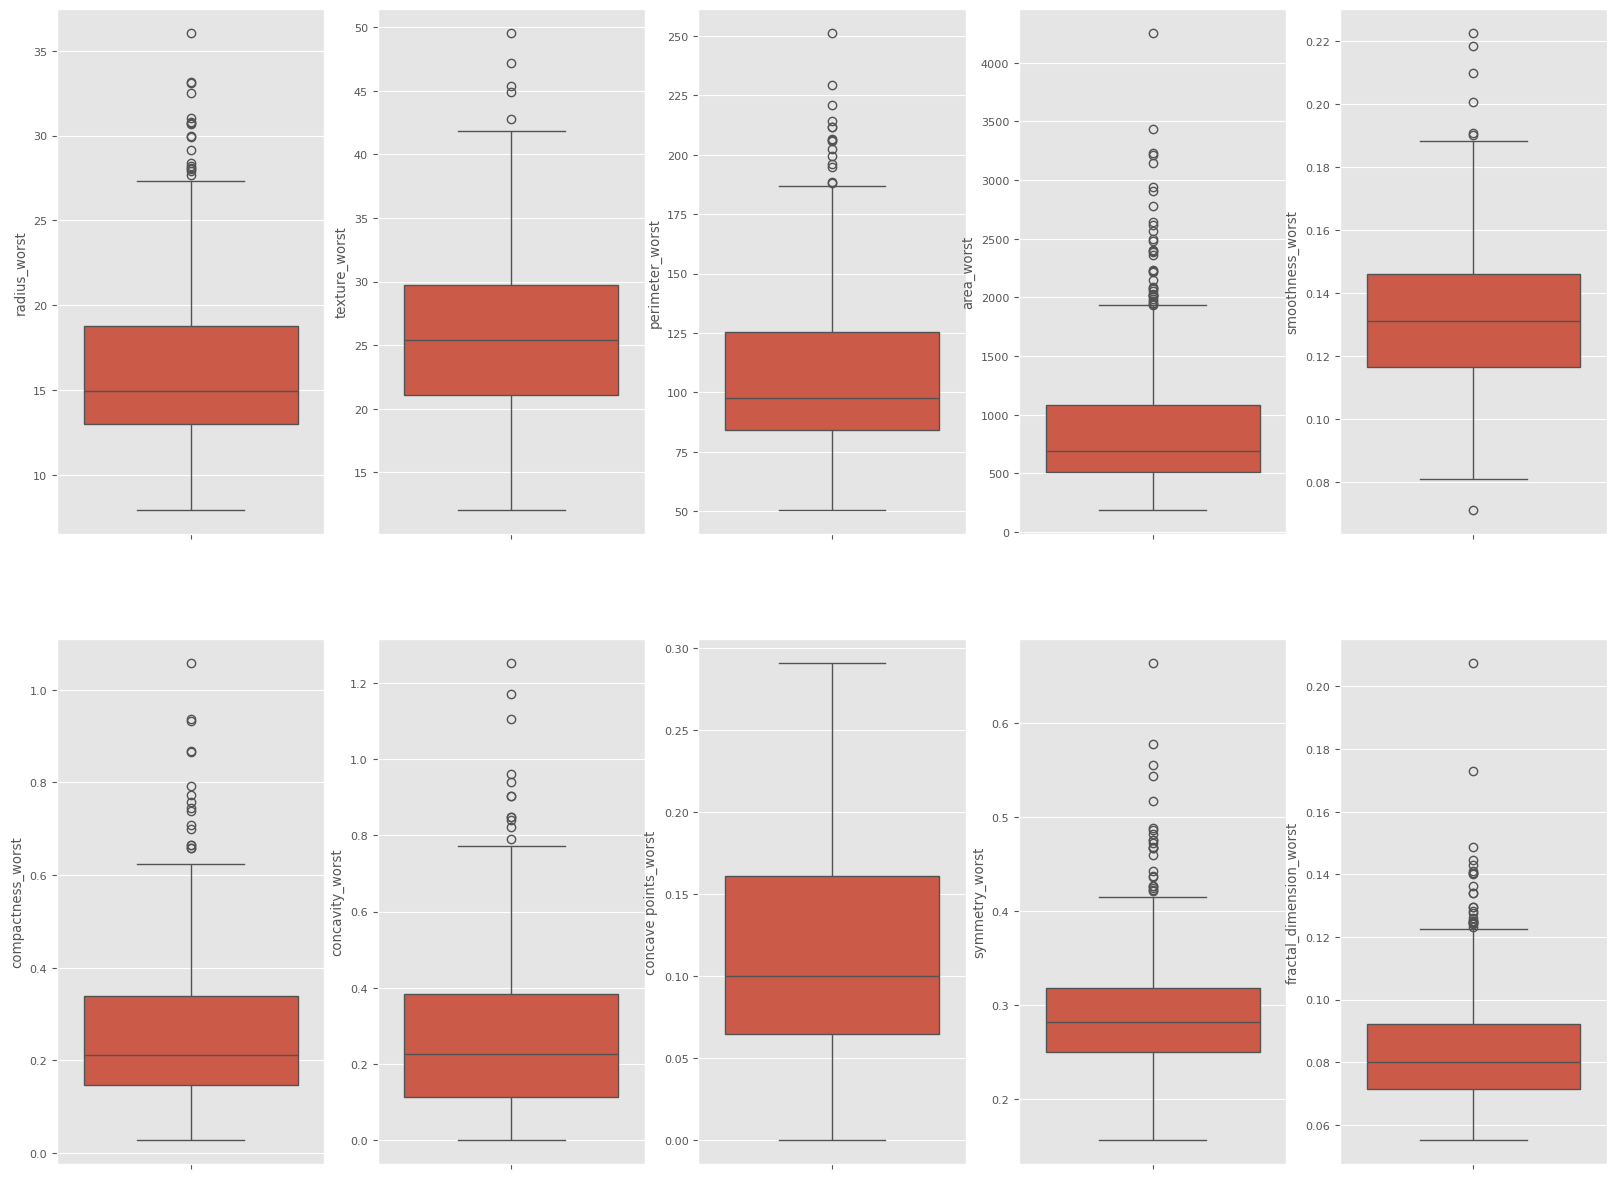

In [42]:
plt.figure(figsize=(20,15))
pos = 1
for i in df.columns[21:]:
    plt.subplot(2, 5, pos)
    sns.boxplot(data=df[i])
    pos += 1

## Pairplot
Usiamo i pairplot per esaminare:
- Le distribuzioni univariate di ogni variabile lungo la diagonale della matrice, utile per identificare asimmetrie o concentrazioni di dati.
- Le relazioni bivariate tra le variabili nelle sezioni fuori diagonale, che possono rivelare pattern di correlazione, cluster o outlier significativi.

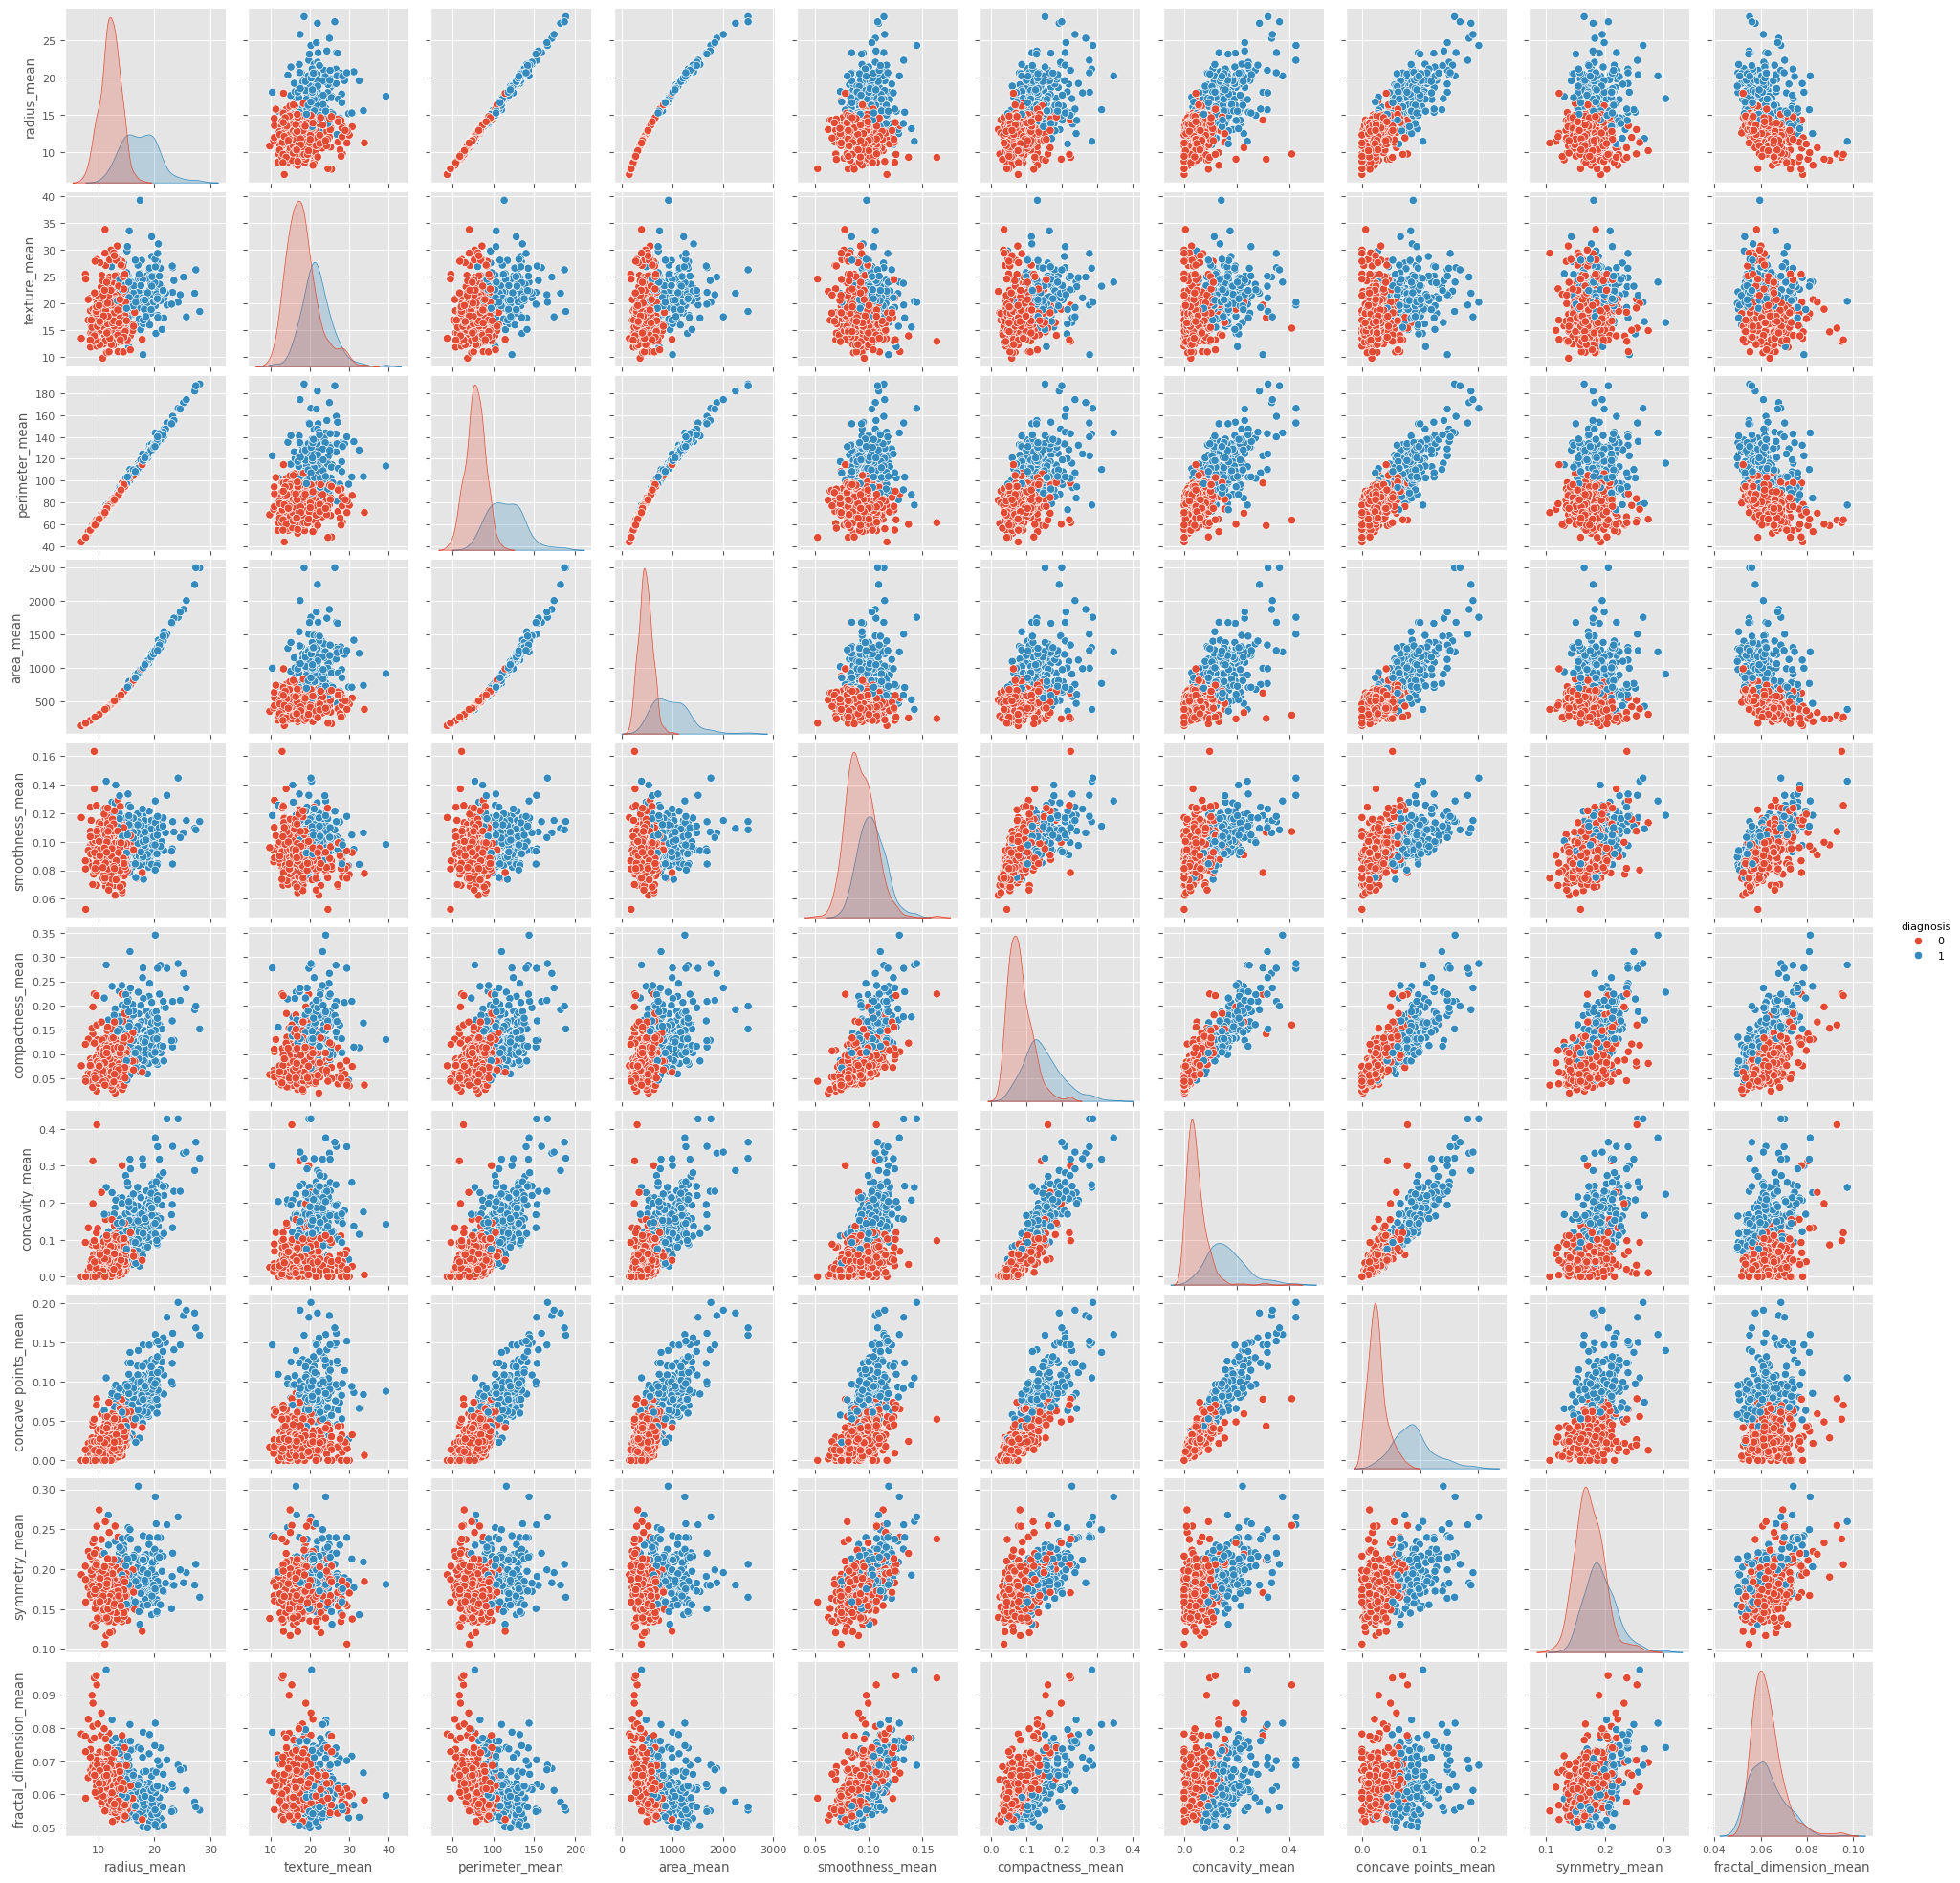

In [43]:
df_mean = df.iloc[:, :11]
sns.pairplot(df_mean, hue = 'diagnosis', height=2)

# Splitting del Dataset
In questa fase, procediamo alla suddivisione del dataset in set di addestramento e di test. La variabile target, rappresentata dalla colonna diagnosis, indica la classificazione delle cellule in benigne o maligne. Per costruire e valutare un modello predittivo accurato, separiamo questa variabile dalle altre caratteristiche (feature) presenti nel dataset. Utilizzando la funzione train_test_split di scikit-learn, creiamo un set di addestramento contenente il 70% dei dati e un set di test con il restante 30%, specificando un random_state per garantire la riproducibilità della suddivisione.

In [53]:
from sklearn.model_selection import train_test_split
DATA = "*********************************************************\n" + "| SI STANNO USANDO I DATI SENZA NESSUNA TRASFORMZAZIONE |\n" + "*********************************************************\n"

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
#random state indica il seed per il random per riottenere sempre gli stessi risultati

X_train_DF = pd.DataFrame(X_train, columns=df.columns[1:])
X_test_DF = pd.DataFrame(X_test, columns=df.columns[1:])

#X_train_DF.iloc[:, :10].hist(figsize=(10,10))



# Standardizzazione

La standardizzazione di un dataset consiste nel trasformare le caratteristiche in modo che abbiano una media di 0 e una deviazione standard di 1. Questo processo è essenziale per molti algoritmi di machine learning (come le regressioni, i modelli basati su distanze e le reti neurali), in quanto evita che le caratteristiche con valori numerici più grandi dominino il modello e garantisce una convergenza più rapida durante l'addestramento.

La standardizzazione viene eseguita dopo la suddivisione del dataset per evitare **data leakage** (fuga di informazioni) per i seguenti motivi:
- **Evitare l'introduzione di bias**: Se si standardizza l'intero dataset prima dello split, i dati di test "vedono" indirettamente la distribuzione dei dati di addestramento. Questo porta a metriche di valutazione non realisticamente ottimistiche.
- **Simulare nuovi dati**: Standardizzare solo sui dati di addestramento e poi applicare la stessa trasformazione sui dati di test simula il caso reale in cui il modello deve fare previsioni su dati nuovi, mai visti durante l'addestramento.

In [56]:
from sklearn.preprocessing import StandardScaler
DATA =  "******************************************\n" + "| SI STANNO USANDO I DATI STANDARDIZZATI |\n" +  "******************************************\n"

scaler = StandardScaler()

# Calcola la media e la deviazione standard sui dati di addestramento e applica la trasformazione
X_train = scaler.fit_transform(X_train)

# Applica la trasformazione anche sui dati di test, ma senza ricalcolare media e deviazione standard
X_test = scaler.transform(X_test)

X_train_DF = pd.DataFrame(X_train, columns=df.columns[1:])
X_test_DF = pd.DataFrame(X_test, columns=df.columns[1:])

X_train_DF.describe()
#X_train_DF.iloc[:, :10].hist(figsize=(10,10))




radius_mean  texture_mean  perimeter_mean     area_mean  \
count  3.980000e+02  3.980000e+02    3.980000e+02  3.980000e+02   
mean   1.919179e-16  7.051869e-16    8.926416e-17 -1.115802e-17   
std    1.001259e+00  1.001259e+00    1.001259e+00  1.001259e+00   
min   -2.004538e+00 -2.265799e+00   -1.962370e+00 -1.415904e+00   
25%   -6.887687e-01 -7.551212e-01   -6.882273e-01 -6.596851e-01   
50%   -2.435940e-01 -1.117840e-01   -2.504428e-01 -3.097783e-01   
75%    4.415577e-01  5.745618e-01    4.907188e-01  3.203135e-01   
max    3.874272e+00  3.492577e+00    3.887288e+00  5.023637e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     3.980000e+02      3.980000e+02    3.980000e+02         3.980000e+02   
mean     -3.749095e-16      1.696019e-16    7.141133e-17        -1.115802e-16   
std       1.001259e+00      1.001259e+00    1.001259e+00         1.001259e+00   
min      -3.154619e+00     -1.661853e+00   -1.137578e+00        -1.263267e+00   
25%      -7.004241e-01     -7.313526e-01   -7.483043e-01        -7.345076e-01   
50%      -3.165413e-02     -1.970875e-01   -3.349449e-01        -3.985115e-01   
75%       6.421523e-01      4.840367e-01    5.122082e-01         6.521782e-01   
max       3.469765e+00      4.067714e+00    4.330322e+00         3.873693e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   3.980000e+02            3.980000e+02  ...  3.980000e+02   
mean    1.467280e-16            3.436670e-16  ... -4.373944e-16   
std     1.001259e+00            1.001259e+00  ...  1.001259e+00   
min    -2.665744e+00           -1.851347e+00  ... -1.699888e+00   
25%    -6.842324e-01           -7.240302e-01  ... -6.669023e-01   
50%    -5.525183e-02           -1.359284e-01  ... -2.913171e-01   
75%     5.246593e-01            4.507140e-01  ...  5.334579e-01   
max     4.400250e+00            5.077455e+00  ...  3.968676e+00   

       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
count   3.980000e+02     3.980000e+02  398.000000      3.980000e+02   
mean   -7.230397e-16    -2.320868e-16    0.000000     -3.570567e-17   
std     1.001259e+00     1.001259e+00    1.001259      1.001259e+00   
min    -2.201156e+00    -1.665615e+00   -1.187480     -2.672370e+00   
25%    -7.605410e-01    -6.860942e-01   -0.632759     -7.068235e-01   
50%    -6.181413e-02    -2.987167e-01   -0.355462     -1.215325e-02   
75%     6.381342e-01     5.241247e-01    0.333281      5.551245e-01   
max     3.909853e+00     4.168365e+00    5.626762      3.922860e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       3.980000e+02     3.980000e+02          3.980000e+02   
mean        2.454764e-16    -4.463208e-17          1.517491e-16   
std         1.001259e+00     1.001259e+00          1.001259e+00   
min        -1.473214e+00    -1.391304e+00         -1.756275e+00   
25%        -6.827132e-01    -7.742265e-01         -7.606279e-01   
50%        -2.435097e-01    -2.004118e-01         -2.494669e-01   
75%         4.926776e-01     5.710645e-01          7.023581e-01   
max         5.243276e+00     4.333890e+00          2.668655e+00   

       symmetry_worst  fractal_dimension_worst  
count    3.980000e+02             3.980000e+02  
mean     3.302774e-16             2.231604e-18  
std      1.001259e+00             1.001259e+00  
min     -2.094184e+00            -1.599036e+00  
25%     -6.524167e-01            -6.833502e-01  
50%     -1.300027e-01            -2.031343e-01  
75%      4.590940e-01             4.535557e-01  
max      5.912480e+00             6.901830e+00  

[8 rows x 30 columns]

# Normalizzazione min-max
La Min-Max Normalization è una tecnica di scaling che ridimensiona le variabili del dataset in un intervallo specifico, solitamente tra 0 e 1. Questo processo è utile quando i dati contengono variabili con scale diverse, poiché alcuni modelli di machine learning (come le reti neurali o le SVM) sono sensibili alle differenze di scala tra le variabili.


La normalizzazione deve essere eseguita solo sui dati di addestramento e non sul dataset intero prima di dividerlo. Questo perché, durante il training di un modello, vogliamo che il modello "veda" i dati nel loro stato naturale, senza influenze derivanti dal set di test. Se normalizzassimo l'intero dataset prima della divisione, il modello potrebbe acquisire informazioni dal set di test durante il processo di normalizzazione (poiché il minimo e il massimo potrebbero provenire anche dai dati di test), il che potrebbe compromettere l'affidabilità della valutazione finale del modello.




In [46]:
from sklearn.preprocessing import MinMaxScaler
DATA =  "************************************************\n" + "| SI STANNO USANDO I DATI MIN-MAX NORMALIZZATI |\n" + "************************************************\n"

scaler = MinMaxScaler()

# Applica la normalizzazione solo al set di addestramento
X_train = scaler.fit_transform(X_train)

# Usa gli stessi parametri di scaling (minimo e massimo) per il set di test
X_test = scaler.transform(X_test)

X_train_DF = pd.DataFrame(X_train, columns=df.columns[1:])
X_test_DF = pd.DataFrame(X_test, columns=df.columns[1:])

X_train_DF.describe()
#X_train_DF.iloc[:, :10].hist(figsize=(10,10))



radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   398.000000    398.000000      398.000000  398.000000       398.000000   
mean      0.340977      0.393479        0.335468    0.219877         0.476213   
std       0.170317      0.173879        0.171165    0.155486         0.151147   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223816      0.262344        0.217815    0.117434         0.370479   
50%       0.299541      0.374066        0.292654    0.171771         0.471435   
75%       0.416087      0.493257        0.419356    0.269618         0.573151   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        398.000000      398.000000           398.000000     398.000000   
mean           0.290049        0.208047             0.245917       0.377264   
std            0.174753        0.183116             0.194913       0.141701   
min            0.000000        0.000000             0.000000       0.000000   
25%            0.162403        0.071193             0.102932       0.280429   
50%            0.255650        0.146790             0.168340       0.369444   
75%            0.374529        0.301722             0.372875       0.451515   
max            1.000000        1.000000             1.000000       1.000000   

       fractal_dimension_mean  ...  radius_worst  texture_worst  \
count              398.000000  ...    398.000000     398.000000   
mean                 0.267196  ...      0.299880       0.360195   
std                  0.144507  ...      0.176634       0.163845   
min                  0.000000  ...      0.000000       0.000000   
25%                  0.162700  ...      0.182231       0.235741   
50%                  0.247578  ...      0.248488       0.350080   
75%                  0.332245  ...      0.393988       0.464619   
max                  1.000000  ...      1.000000       1.000000   

       perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
count       398.000000  398.000000        398.000000         398.000000   
mean          0.285502    0.174264          0.405197           0.219343   
std           0.171625    0.146936          0.151816           0.149075   
min           0.000000    0.000000          0.000000           0.000000   
25%           0.167899    0.081406          0.298025           0.117696   
50%           0.234300    0.122100          0.403355           0.183087   
75%           0.375342    0.223174          0.489368           0.292696   
max           1.000000    1.000000          1.000000           1.000000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       398.000000            398.000000      398.000000   
mean          0.243014              0.396905        0.261555   
std           0.174886              0.226277        0.125053   
min           0.000000              0.000000        0.000000   
25%           0.107783              0.225009        0.180071   
50%           0.208009              0.340527        0.245318   
75%           0.342760              0.555632        0.318894   
max           1.000000              1.000000        1.000000   

       fractal_dimension_worst  
count               398.000000  
mean                  0.188103  
std                   0.117783  
min                   0.000000  
25%                   0.107717  
50%                   0.164207  
75%                   0.241457  
max                   1.000000  

[8 rows x 30 columns]

# Modelli

### Logistic Regression

*********************************************************
| SI STANNO USANDO I DATI SENZA NESSUNA TRASFORMZAZIONE |
*********************************************************

Accuratezza Regressione Logistica: 95.91%

Confusion Matrix Regressione Logistica: 
 [[103   5]
 [  2  61]]

Report Regressione Logistica: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



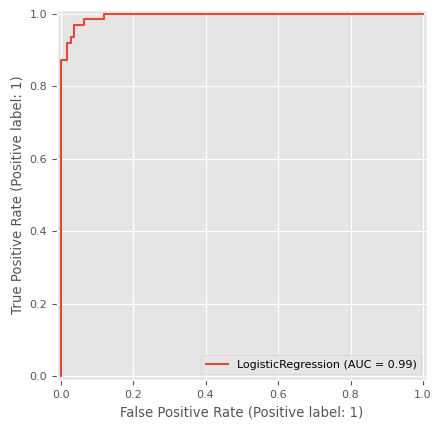

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# model predictions
y_pred = log_reg.predict(X_test)

# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg_acc = accuracy_score(y_test, y_pred)
print(DATA)

print(f"Accuratezza Regressione Logistica: {round(log_reg_acc*100, 2)}%")

# confusion matrix
print("\nConfusion Matrix Regressione Logistica: \n" ,confusion_matrix(y_test, y_pred))

# classification report
print("\nReport Regressione Logistica: \n" , classification_report(y_test, y_pred))

## roc plot
import sklearn.metrics
sklearn.metrics.RocCurveDisplay.from_estimator(log_reg, X_test, y_test)


### Decision Tree Classifier

******************************************
| SI STANNO USANDO I DATI STANDARDIZZATI |
******************************************

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Best Parameter:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'random'}
Accuratezza Decision Tree: 94.74%

Confusion Matrix Decision Tree: 
 [[102   6]
 [  3  60]]

Report Decision Tree: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



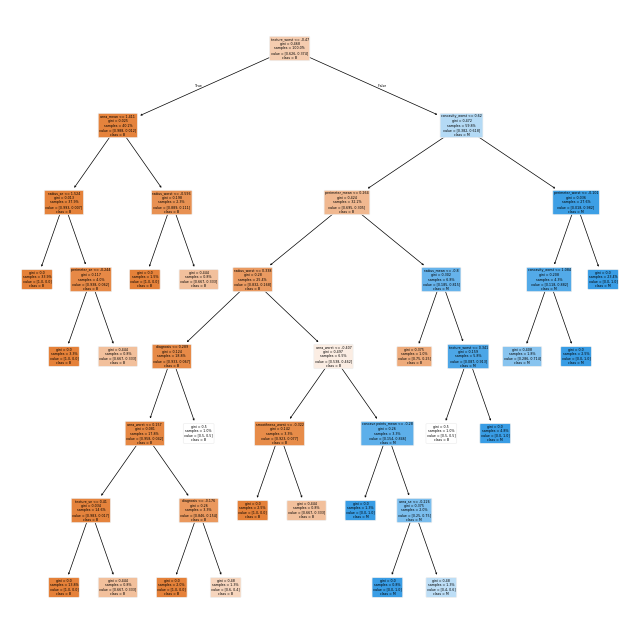

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

print(DATA)

dtc = DecisionTreeClassifier(random_state=0)

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X, y)

print("Best Parameter: " ,grid_search_dt.best_params_)

#extracting best parameter
bp = grid_search_dt.best_params_
criterion, max_depth, min_samples_leaf, min_samples_split, splitter = bp['criterion'], bp['max_depth'], bp['min_samples_leaf'], bp['min_samples_split'], bp['splitter']

#Building the model
dtc = DecisionTreeClassifier(criterion = criterion, 
                            max_depth = max_depth,
                            min_samples_leaf = min_samples_leaf,
                            min_samples_split = min_samples_split,
                            splitter = splitter,
                            random_state=0)
dtc.fit(X_train, y_train)

#Predict
y_pred = dtc.predict(X_test)

#accuracy score
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Accuratezza Decision Tree: {round(dtc_acc*100, 2)}%")

#confusion matrix
print("\nConfusion Matrix Decision Tree: \n", confusion_matrix(y_test, y_pred))

#report
print("\nReport Decision Tree: \n" ,classification_report(y_test, y_pred))

#Plotting the tree
from matplotlib import pyplot
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

figure(figsize=(8,8))

#giving name
colum = df.columns
colums_names = []
for c in colum:
    colums_names.append(c)

plot_tree(dtc, filled=True, feature_names=colums_names, class_names=['B', 'M'], rounded = True, proportion = True)
plt.savefig('out.pdf')


### k-Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

print(DATA)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# model predictions 
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuratezza KNN: {round(knn_acc*100, 2)}%")

# confusion matrix
print("\n Confusion Matrix KNN")
print(confusion_matrix(y_test, y_pred))

# classification report
print("\n Report KNN")
print(classification_report(y_test, y_pred))



************************************************
| SI STANNO USANDO I DATI MIN-MAX NORMALIZZATI |
************************************************

Accuratezza KNN: 95.32%

 Confusion Matrix KNN
[[106   2]
 [  6  57]]

 Report KNN
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



### Support Vector Machine

******************************************
| SI STANNO USANDO I DATI STANDARDIZZATI |
******************************************

Best Parameter: {'C': 10, 'gamma': 0.01}
Accuratezza Support Vector Machine: 98.83%

 Confusion Matrix Support Vector Machine
[[107   1]
 [  1  62]]

 Report Support Vector Machine
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



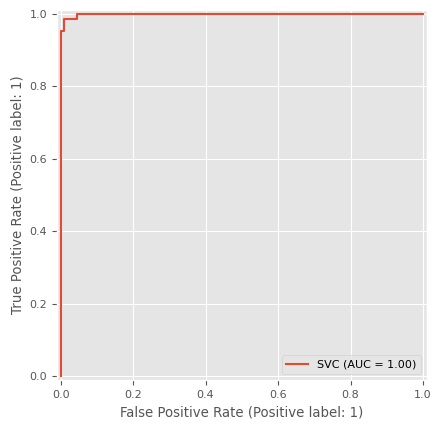

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

print(DATA)

svc = SVC(random_state=0)
parameters = {
    'gamma' : [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 25, 30, 40, 50]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

print("Best Parameter: " + str(grid_search.best_params_))

#Strazione migliori parametri
gamma, C = grid_search.best_params_['gamma'], grid_search.best_params_['C']

svc = SVC(C = C, gamma = gamma)
svc.fit(X_train, y_train)

# model predictions 
y_pred = svc.predict(X_test)

# accuracy score
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"Accuratezza Support Vector Machine: {round(svc_acc*100, 2)}%")

# confusion matrix
print("\n Confusion Matrix Support Vector Machine")
print(confusion_matrix(y_test, y_pred))

# classification report
print("\n Report Support Vector Machine")
print(classification_report(y_test, y_pred))

## roc plot
sklearn.metrics.RocCurveDisplay.from_estimator(svc, X_test, y_test)